**Sprawozdanie lab4 Krzysztof Kucaba**

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize
import scipy.interpolate
import time
import functools
import operator


<a id='zad1'></a>
***Zadanie 1.***  

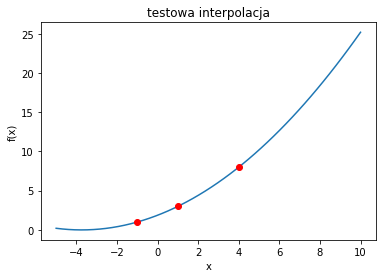

In [3]:
def wiellarg(xvect,x,x0):
    res= lambda x: functools.reduce(operator.mul,[(x-xvect[i])/(xvect[x0]-xvect[i]) for i in range(0,len(xvect)) if i !=x0])
    return res

def lagrange(xvect,yvect):
    wiel= lambda x: functools.reduce(operator.add,([yvect[i]*wiellarg(xvect,x,i)(x) for i in range(0,len(xvect)) ]))
    return wiel

x=[-1,1,4]
y=[1,3,8]

wiel=lagrange(x,y)

x1 = np.linspace(-5,10)
plt.figure()
y1=wiel(x1)
plt.plot(x1,y1)
plt.plot(x,y,'ro')

plt.title('testowa interpolacja')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

<a id='zad2'></a>
***Zadanie 2.*** 

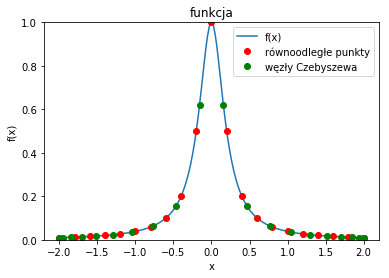

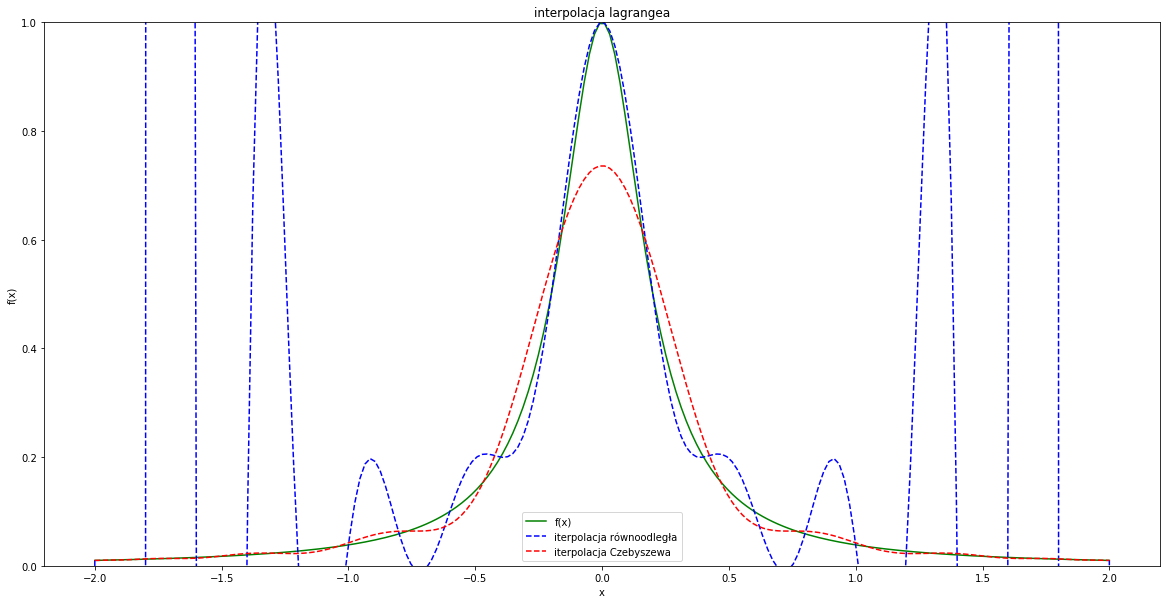

Interpolacja punktami równo odległymi powoduje duże niedokładnoci otrzymanego wielomianu blisko krańców przedziału
Interpolacja w punktach Czebyszewa zwiększa dokładność otrzymanego wielomianu blisko krańców przedziału kosztem dokładności w środku przedziału


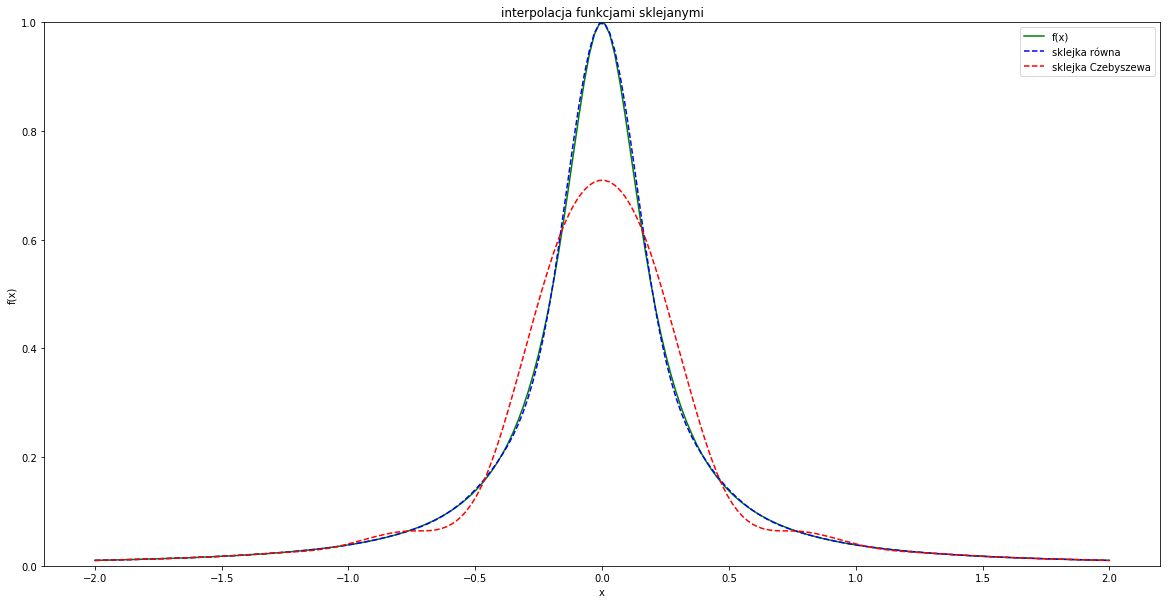

Interpolacja funkcjami sklejanymi jest bardzo dokładna dla równo odległych punktów, niedokładna w środku przedziału dla węzłów Czebyszewa


In [4]:
f = lambda x: 1/((25*x**2)+1)

def czebyszew(start,stop,ile):
    ile = ile-2
    wynik=[math.cos(math.pi*(2*i+1)/(2*ile+2))*((stop-start)/2)+(stop+start)/2 for i in range(ile)]
    wynik=[start]+ wynik+[stop]
    return wynik

pocz=-2
kon=2
ile=21

x1 = np.linspace(pocz,kon,num=200)
y1=[f(x1[i]) for i in range(len(x1))]
plt.plot(x1,y1,label='f(x)')

xrowne=np.linspace(pocz,kon,ile)
yrowne=[f(xrowne[i]) for i in range(len(xrowne))]
plt.plot(xrowne,yrowne,'ro',label='równoodległe punkty')

xczeb=czebyszew(pocz,kon,ile)
yczeb=[f(xczeb[i]) for i in range(len(xczeb))]
plt.plot(xczeb,yczeb,'go',label='węzły Czebyszewa')

plt.title('funkcja')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()


plt.figure(figsize=(20,10))
y1=[f(x1[i]) for i in range(len(x1))]
plt.plot(x1,y1,'g-',label='f(x)')

flagr=lagrange(xrowne,yrowne)
#ylagrrowne = flagr(x1[i]) for i in range(len(x1))]
plt.plot(x1,flagr(x1),'b--',label='iterpolacja równoodległa')

flagr=lagrange(xczeb,yczeb)
ylagrrowne = [flagr(x1[i]) for i in range(len(x1))]
plt.plot(x1,ylagrrowne,'r--',label='iterpolacja Czebyszewa')

plt.title('interpolacja lagrangea')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

plt.figure(figsize=(20,10))
print("Interpolacja punktami równo odległymi powoduje duże niedokładnoci otrzymanego wielomianu blisko krańców przedziału")
print("Interpolacja w punktach Czebyszewa zwiększa dokładność otrzymanego wielomianu blisko krańców przedziału kosztem dokładności w środku przedziału")

plt.plot(x1,y1,'g-',label='f(x)')

fsklejrown = scipy.interpolate.interp1d(xrowne,yrowne,kind=3)
ysklejrown=[fsklejrown(x1[i]) for i in range(len(x1))]
plt.plot(x1,ysklejrown,'b--',label='sklejka równa')


fsklejlczeb= scipy.interpolate.interp1d(xczeb,yczeb,kind=3)
ysklejczeb=[fsklejlczeb(x1[i]) for i in range(len(x1))]
plt.plot(x1,ysklejczeb,'r--',label='sklejka Czebyszewa')

plt.title('interpolacja funkcjami sklejanymi')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

print("Interpolacja funkcjami sklejanymi jest bardzo dokładna dla równo odległych punktów, niedokładna w środku przedziału dla węzłów Czebyszewa")


<a id='zad3'></a>
***Zadanie 3.***  

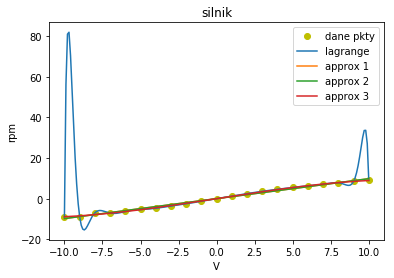

Interpolacja jest nieefektywna przy wyznaczaniu generalnego trendu danych szczególnie dla dużej ilości punktów, aproxymacja lepiej przewiduje zachowanie zaburzonych danych


In [5]:
V=[i for i in range(-10,11)]
rpm=[-9.1,-8.82,-7.00,-7.1,-6.32,-5.33,-4.73,-3.65,-2.52,-1.28,0,1.26,2.49,3.61,4.61,5.51,6.32,7.1,7.81,8.45,9.02]

x=np.linspace(min(V),max(V),200)

plt.plot(V,rpm,'yo',label='dane pkty')

wiel=lagrange(V,rpm)
ylagr=wiel(x)
plt.plot(x,ylagr,label='lagrange')


fit1=np.polyfit(V,rpm,1)
yfit1=np.polyval(fit1,x)
plt.plot(x,yfit1,label='approx 1')

fitj2=np.polyfit(V,rpm,2)
yfit2=np.polyval(fit1,x)
plt.plot(x,yfit2,label='approx 2')

fit3=np.polyfit(V,rpm,3)
yfit3=np.polyval(fit3,x)
plt.plot(x,yfit3,label='approx 3')

plt.title('silnik')
plt.xlabel('V')
plt.ylabel('rpm')
plt.legend()
plt.show()

print('Interpolacja jest nieefektywna przy wyznaczaniu generalnego trendu danych szczególnie dla dużej ilości punktów, aproxymacja lepiej przewiduje zachowanie zaburzonych danych')



<a id='zad4'></a>
***Zadanie 4.***  

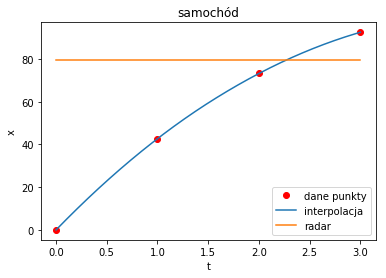

auto mija radar w 2.27466s
v w momencie mijania radaru wynosi 21.78624m/s


In [6]:
t=[i for i in range(4)]
x=[0,42.7,73.2,92.5]

inter=scipy.interpolate.interp1d(t,x,kind=2)
tinter=np.linspace(min(t),max(t),200)
xinter=inter(tinter)
plt.plot(t,x,'ro',label='dane punkty')
plt.plot(tinter,xinter,label='interpolacja')
plt.plot(tinter,[79.6 for i in range(len(tinter))],label='radar')

plt.title('samochód')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

inter0 =lambda z: inter(z) - 79.6

t0=scipy.optimize.newton(func=inter0,x0=2,tol=10**-10)

d=10**-10
v0=(inter(t0+d)-inter(t0-d))/(2*d)

print('auto mija radar w {:.5f}s'.format(t0))
print('v w momencie mijania radaru wynosi {:.5f}m/s'.format(v0))


